**CMPE 255 DataMining Assignment 1**

**Dataset Used: Hotel Booking Demand**

Dataset link: [https://www.kaggle.com/jessemostipak/hotel-booking-demand](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

In [142]:
#load the useful packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns  # for graphics
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Load the dataset**

In [143]:
dataset=pd.read_csv('/content/hotel_bookings.csv')

In [144]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [146]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [147]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Data Cleaning and Preprocessing**

In [148]:
dataset.shape

(119390, 32)

In [149]:
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

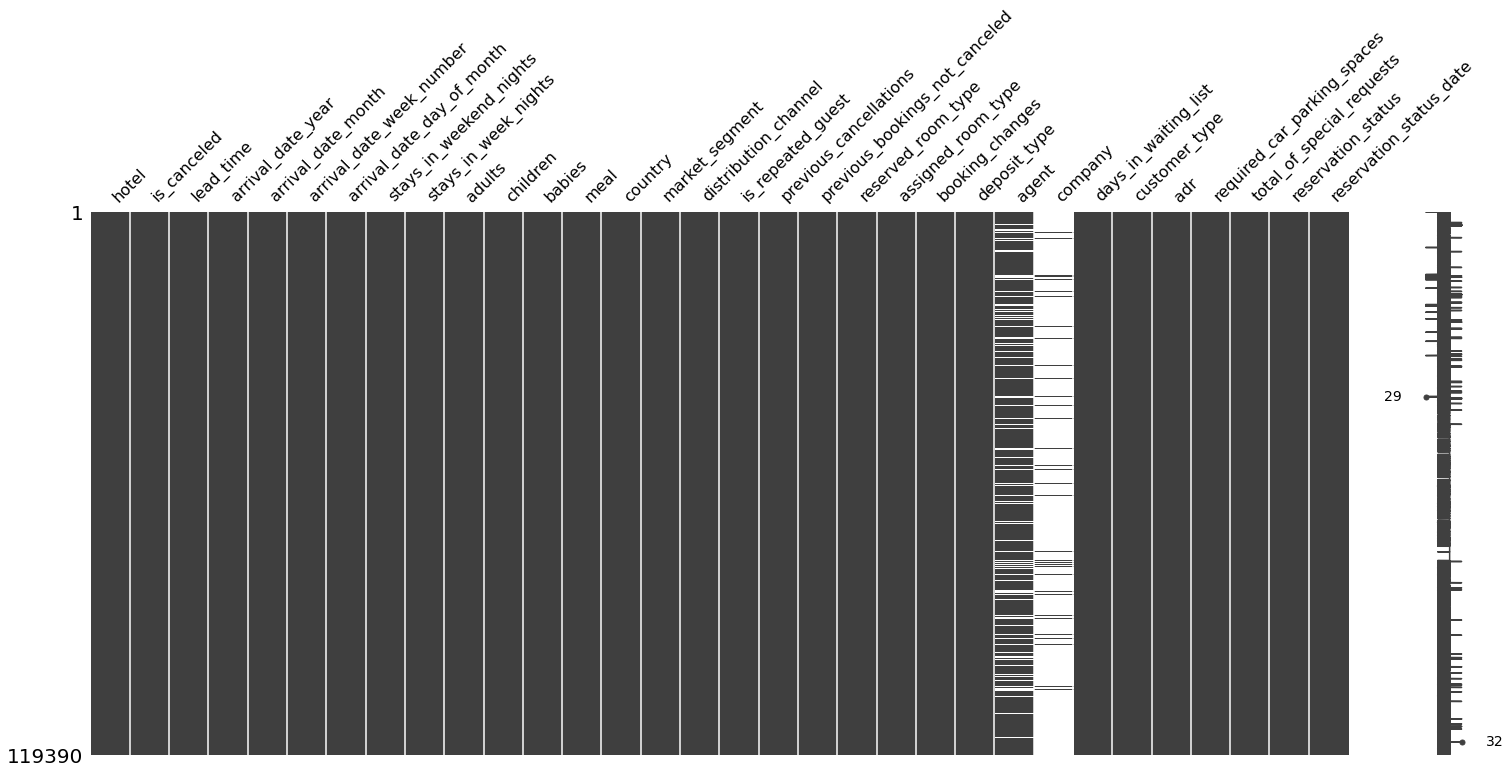

In [150]:
msno.matrix(dataset);

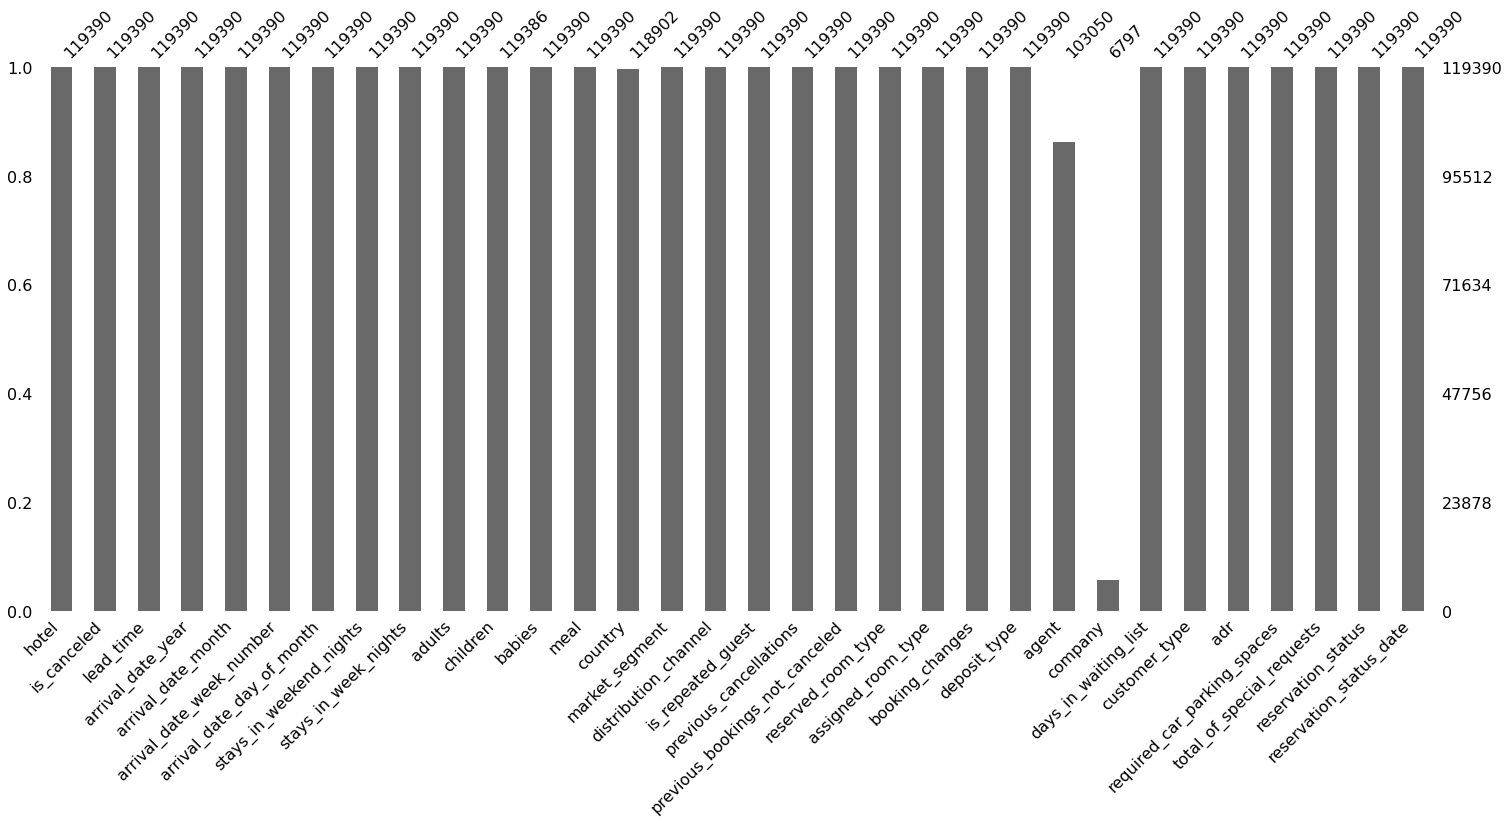

In [151]:
msno.bar(dataset)

**From the above visualization and analysis we can see that the columns "agent" and "company" have significantly many missing values. There are also few missing values in "children" and "country".**

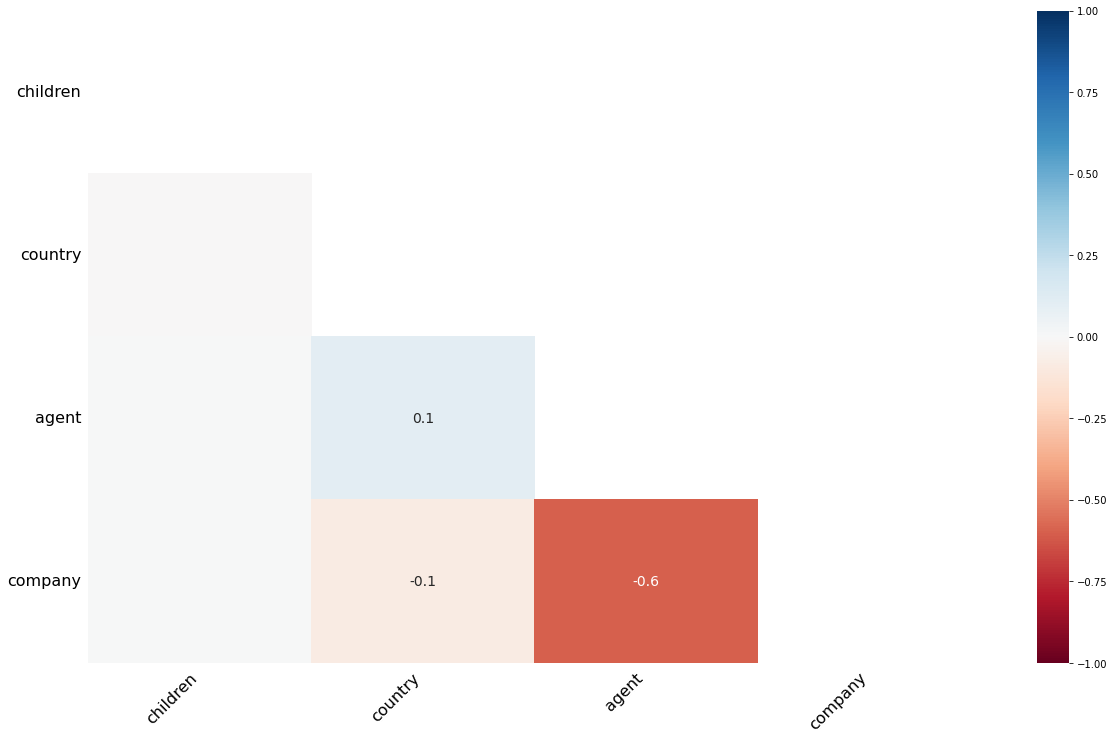

In [152]:
msno.heatmap(dataset)

**The above heatmap shows the correlation of missing values of two columns. A value near 0 means there is no dependence between the occurrence of missing values of two variables.**


In [153]:
for i in dataset.columns:
    null_rate = dataset[i].isna().sum() / len(dataset) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

children's null rate :0.0%
country's null rate :0.41%
agent's null rate :13.69%
company's null rate :94.31%


**To replace the null values accordingly for better comprehension.**

In [154]:
dataset.fillna(0,inplace=True)

In [155]:
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [156]:
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**To check the type of hotels**

In [157]:
dataset['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

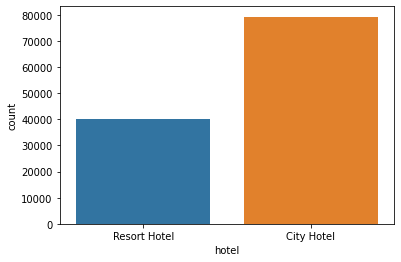

In [158]:
sns.countplot(data=dataset, x = 'hotel')

**To convert data type to Integer values**

In [159]:
# the number of children, agent, company should be interger
cols = ["children", "agent", "company"]
dataset[cols] = dataset[cols].applymap(np.int64)

**To find unique values and count for Meal choices** 

In [160]:
dataset.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [161]:
dataset['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [162]:
meal_interpretation = {
    'BB' : "Breakfast",
    'FB' : "Full Board",
    'HB' : "Half Board",
    'SC' : "No meal",
    'Undefined' : "No meal"
}

dataset["meal"] = dataset["meal"].replace(meal_interpretation)
dataset["meal"].unique()

# the type of "meal" should be a category
dataset["meal"] = pd.Categorical(dataset["meal"])

**To visualize the type of hotel and the percentage of the occupancy**

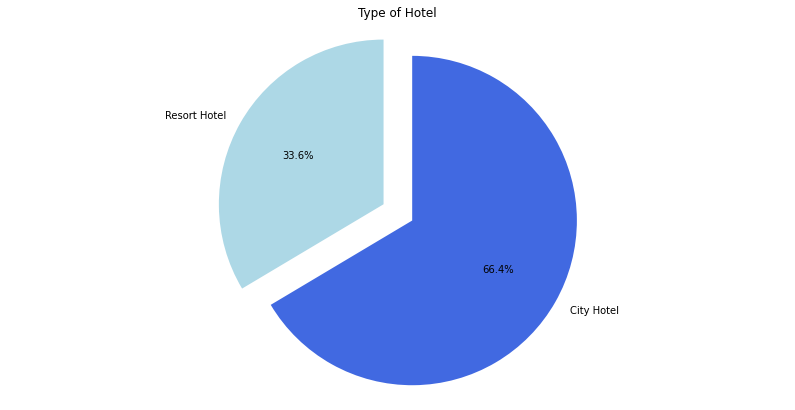

In [163]:
plt.figure(figsize=(14, 7))
labels=['Resort Hotel', 'City Hotel']
plt.pie(dataset['hotel'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.1f%%',colors=['lightblue','royalblue'], startangle=90)
plt.title('Type of Hotel')
plt.axis('equal')
plt.show()

**The City hotel has more number of bookings as compared to resort hotels**

In [164]:
dataset['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [165]:
Resort1=dataset[(dataset['hotel']=='Resort Hotel') & (dataset['is_canceled']== 0)]
City1=dataset[(dataset['hotel']=='City Hotel') & (dataset['is_canceled']== 0)]
print(Resort1.shape)
print(City1.shape)

(28938, 32)
(46228, 32)


**To visualize from which country most of the guest come from**

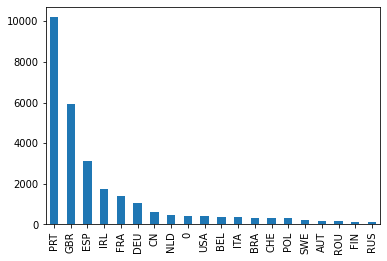

In [166]:
Resort1['country'].value_counts()[:20].plot(kind='bar');

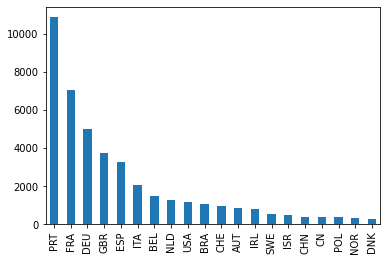

In [167]:
City1['country'].value_counts()[:20].plot(kind='bar') 

**From the bar plots we can conclude that most of the guests come from Europe especially in PRT(Portugal)**

In [168]:
Resort1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,Breakfast,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,Breakfast,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [169]:
City1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0,0,Half Board,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,0,0,Transient,0.00,0,0,Check-Out,2015-07-03
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0,0,Half Board,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1,0,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0,0,Half Board,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1,0,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
40071,City Hotel,0,43,2015,July,27,3,0,2,2,0,0,Half Board,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1,0,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05
40072,City Hotel,0,43,2015,July,27,3,0,2,2,0,0,Half Board,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1,0,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05


In [170]:
resort_data = dataset[dataset["hotel"] == "Resort Hotel"]
city_data = dataset[dataset["hotel"] == "City Hotel"]

In [171]:
def get_country(dataset, n):
    country_data = dataset.groupby(['country']).size().reset_index(name='counts')
    country_data = country_data.sort_values('counts')
    return country_data.tail(n)

In [172]:
dataset['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

**To check Countrywise total number of guests**

In [173]:
guests = dataset[dataset['is_canceled'] == 0]['country'].value_counts().reset_index()
guests.columns = ['country', 'No of guests']
guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,PLW,1
162,SMR,1
163,MMR,1
164,MRT,1


**To check in which year city hotels had more bookings**

In [174]:
#In which year does City Hotel had most booking
data1=dataset[dataset['hotel']=='City Hotel']
data1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0,0,Half Board,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,0,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,0,0,Breakfast,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,0,0,Breakfast,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,0,0,Breakfast,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,0,0,Breakfast,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,76.5,0,1,Canceled,2015-04-02


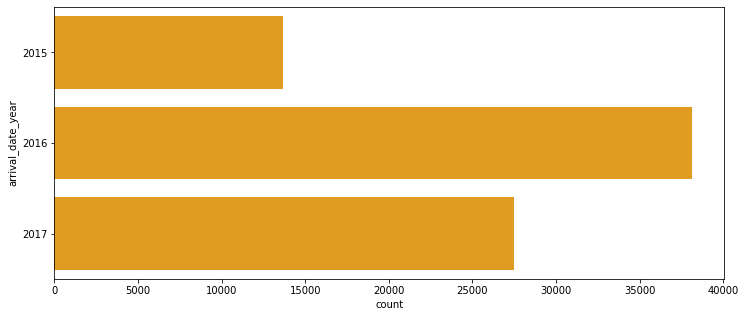

In [175]:
plt.figure(figsize=(12,5))
sns.countplot(y='arrival_date_year',data=data1,color='orange')

**2016 was the year when City Hotel had most bookings**

**To check the busiest month for hotel in 2016**

In [176]:
#Which month was busiest for City Hotel in 2016
data2=data1[data1['arrival_date_year']==2016]
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46421,City Hotel,1,119,2016,January,1,1,0,1,2,0,0,Breakfast,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,14,0,0,Transient,74.25,0,0,Canceled,2015-12-31
46422,City Hotel,0,0,2016,January,1,1,0,1,2,0,0,Breakfast,TUN,Online TA,Direct,0,0,0,A,A,0,No Deposit,9,0,0,Transient,105.00,0,0,Check-Out,2016-01-02
46423,City Hotel,0,0,2016,January,1,1,0,1,2,0,0,No meal,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,86.00,0,0,Check-Out,2016-01-02
46424,City Hotel,0,19,2016,January,1,1,0,2,1,0,0,Breakfast,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,107.00,0,1,Check-Out,2016-01-03
46425,City Hotel,0,30,2016,January,1,1,0,2,2,0,0,No meal,USA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8,0,0,Transient,92.00,0,1,Check-Out,2016-01-03


**To analysis and visualize the children count in the hotels**

In [177]:
children_data = dataset.groupby(['children',"hotel"]).size().reset_index(name='counts')
children_data = children_data.sort_values('counts')

In [178]:
children_data

,children,hotel,counts
8,10,Resort Hotel,1
7,3,Resort Hotel,17
6,3,City Hotel,59
5,2,Resort Hotel,1628
3,1,Resort Hotel,1838
4,2,City Hotel,2024
2,1,City Hotel,3023
1,0,Resort Hotel,36576
0,0,City Hotel,74224


Text(0.5, 1.0, 'Amount of Children per order')

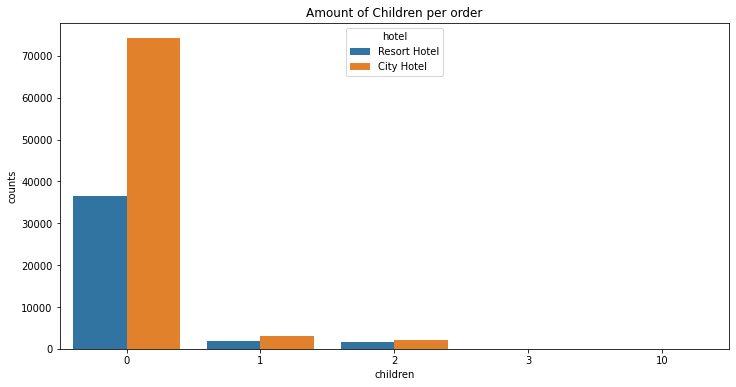

In [179]:
plt.figure(figsize=(12,6))
sns.barplot(x='children', y='counts',hue='hotel', data= children_data)

plt.title('Amount of Children per order')

The absolute amount does not give us enough information. Let's take a look at the frequencies.



In [180]:
resort_data["children"].value_counts(normalize = True)

0     0.913030
1     0.045881
2     0.040639
3     0.000424
10    0.000025
Name: children, dtype: float64

In [181]:
city_data["children"].value_counts(normalize = True)

0    0.935636
1    0.038107
2    0.025514
3    0.000744
Name: children, dtype: float64

From the above data, it is not so clear that guests with more children would prefer resort hotels.



**To analyse and visualize the Meal Choice in the hotel**

In [182]:
meal_labels= ['Breakfast','Half Board', 'No Meal', 'Full Board']

def draw_meal_circle(dataset):
    main_meal = dataset['meal'].value_counts()
    cmap =plt.get_cmap("Set1")
    colors = cmap(np.arange(6)*1)
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(main_meal, labels=meal_labels, colors=colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
    p=plt.gcf()
    p.gca().add_artist(my_circle)

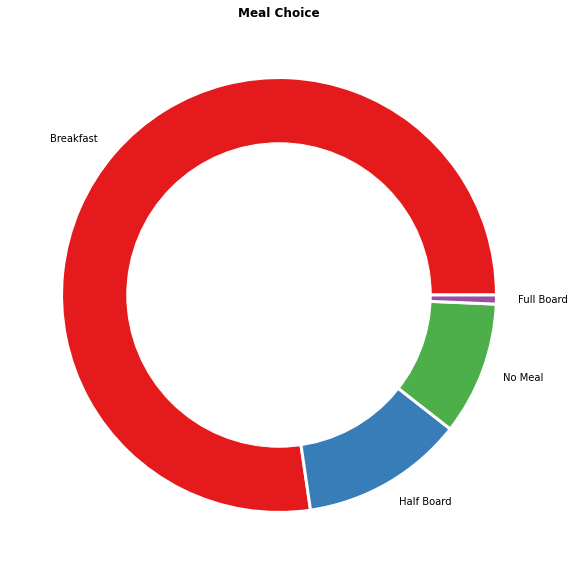

In [183]:
plt.figure(figsize=(10,10))

draw_meal_circle(dataset)
plt.title('Meal Choice', weight='bold')
plt.show()

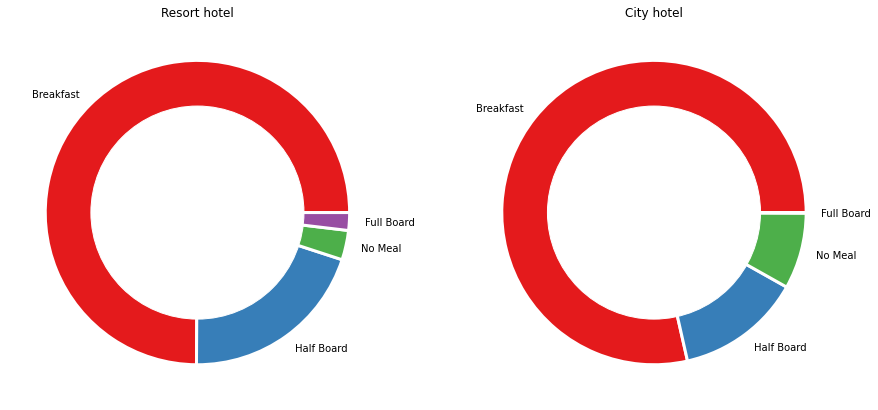

In [184]:
fig, ax = plt.subplots(1,2, figsize=(15,15))
plt.subplot(121)
draw_meal_circle(resort_data)
plt.title("Resort hotel")
plt.subplot(122) 
draw_meal_circle(city_data)
plt.title("City hotel")
plt.show()

**The guests of the city hotel rarely oder Full Board. The reason can be that restaurants are more accessible in the neighbourhood of the city hotel**

**To analyse and visualize the repeated guest at the hotel**

Text(0.5, 1.0, 'Lead time of (repeated) guests in each year')

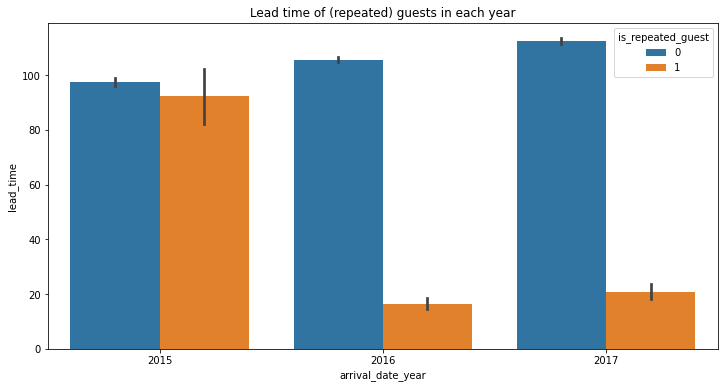

In [185]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_repeated_guest', data= dataset)

plt.title('Lead time of (repeated) guests in each year')

**To analyse and visualize the repeated guest at the Resort hotel**

Text(0.5, 1.0, 'Lead time of (repeated) guests of the resort hotel in each year ')

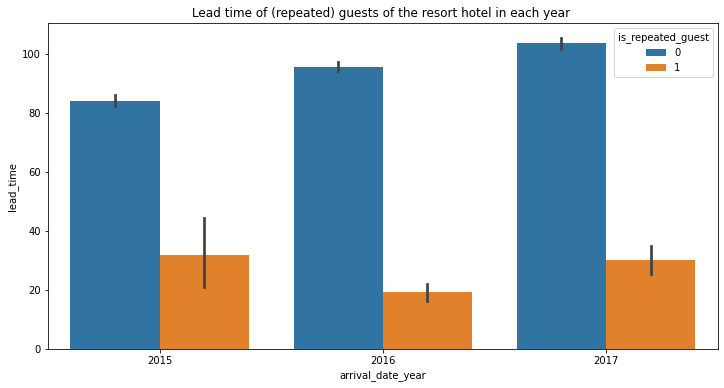

In [186]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_repeated_guest', data= resort_data)

plt.title('Lead time of (repeated) guests of the resort hotel in each year ')

**To analyse and visualize the repeated guest at the City hotel** 

Text(0.5, 1.0, 'Lead time of (repeated) guests of the city hotel in each year')

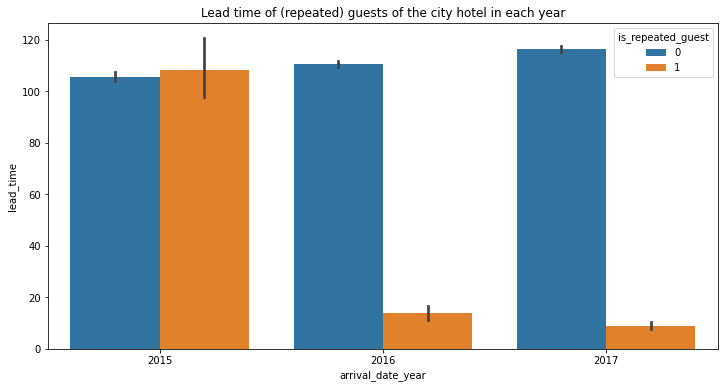

In [187]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_repeated_guest', data= city_data)

plt.title('Lead time of (repeated) guests of the city hotel in each year')

The lead time of repeated guests is significantly shorter, except from in 2015 for the city hotel.



**To check busy months for Hotels**

Text(0, 0.5, 'No. of guests')

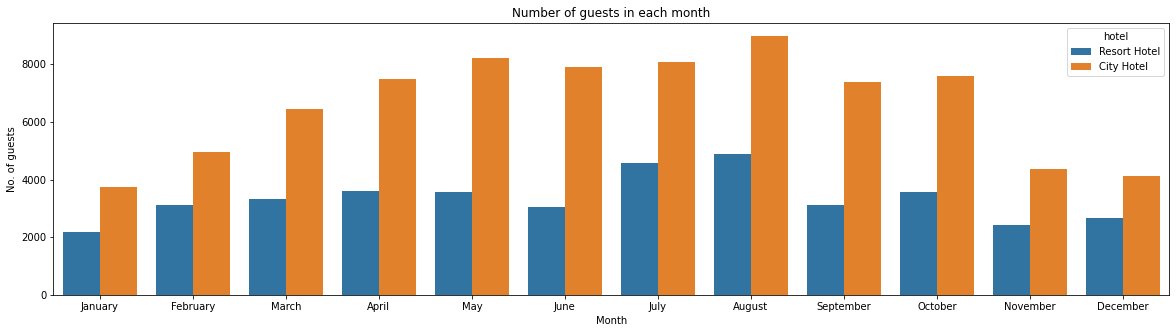

In [188]:
#To check busy months for hotels
plt.figure(figsize=(20,5))
sns.countplot(data = dataset, x= "arrival_date_month",hue="hotel",order=["January","February","March","April","May","June",
                                                                              "July","August","September","October","November","December"]).set_title(
'Number of guests in each month')
plt.xlabel('Month')
plt.ylabel('No. of guests')

**The summer months (from May to August) are the most busy months for the hotels**

In [189]:
# since the the guests with no cancellation records can be wrongly indentified,
# here we only consider guests who have cancelled their booking at least once (the tough customers)
def remove_none_can(dataset):
    clean = dataset[dataset["previous_cancellations"] != 0]
    return clean

In [190]:
prev_can = remove_none_can(dataset).previous_cancellations.value_counts(normalize = True)
prev_can

1     0.933220
2     0.017890
3     0.010025
24    0.007403
11    0.005398
4     0.004781
26    0.004010
25    0.003856
6     0.003393
19    0.002930
5     0.002930
14    0.002159
13    0.001851
21    0.000154
Name: previous_cancellations, dtype: float64

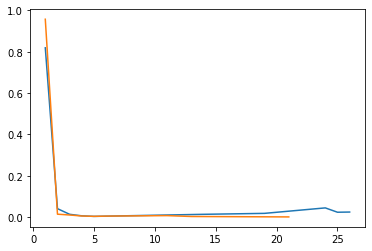

In [191]:
city_can =  remove_none_can(city_data).previous_cancellations.value_counts(normalize = True)
city_can = city_can.sort_index()
resort_can = remove_none_can(resort_data).previous_cancellations.value_counts(normalize = True)
resort_can = resort_can.sort_index()
resort_can.plot.line()
city_can.plot.line()

The guests who have cancellation records of the resort hotel tend to have more cancellations.

**To check the cancellation rate of the booking orders**

Text(0.5, 0, 'Bookings Cancelled')

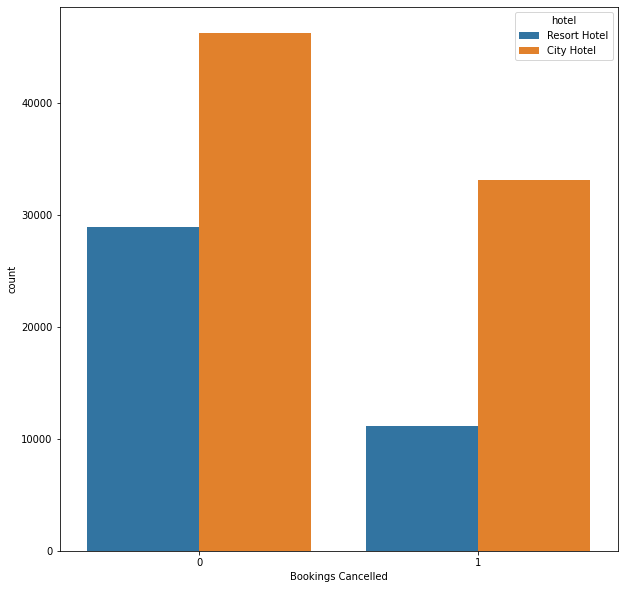

In [192]:
plt.figure(figsize=(10,10))
sns.countplot(data = dataset, x= "is_canceled",hue="hotel")

plt.xlabel("Bookings Cancelled")

The above figure shows the absolute amount of the canceled order of the city hotel and the resort hotel. The big difference does not tell us much information, since the city hotel has overall much more orders. Only the cancellation rate matters

In [193]:
dff=dataset[dataset['is_canceled']==0]
df2=dff.groupby('hotel')['is_canceled'].count()
df2

hotel
City Hotel      46228
Resort Hotel    28938
Name: is_canceled, dtype: int64

City Hotel had most cancellations

In [194]:
# Now we compare the cancel rate of the city hotel and the resort hotel
can_rate = dataset.groupby(["hotel","is_canceled"]).size().reset_index(name='rate')
summe = can_rate.groupby("hotel")['rate'].transform("sum")
can_rate['rate'] = can_rate['rate'].div(summe)
can_rate

,hotel,is_canceled,rate
0,City Hotel,0,0.582730
1,City Hotel,1,0.417270
2,Resort Hotel,0,0.722366
3,Resort Hotel,1,0.277634


From the above analysis we can see that the city hotel has a much higher cancellation rate. However, if we only look at the guests who had canceled before, the guests of resort hotel has more cancellations.

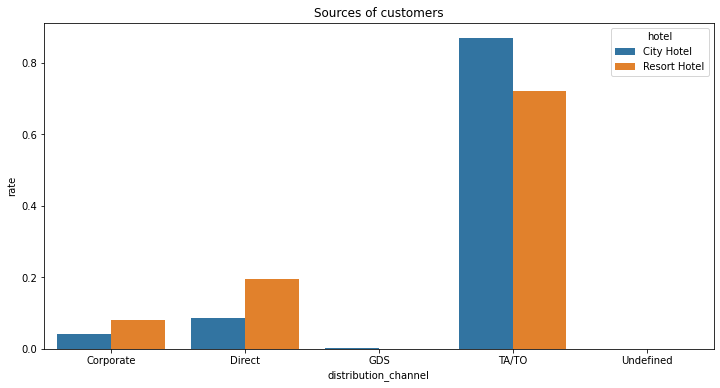

In [195]:
channel_rate = dataset.groupby(["hotel","distribution_channel"]).size().reset_index(name='rate')
summe = channel_rate.groupby("hotel")['rate'].transform("sum")
channel_rate['rate'] = channel_rate['rate'].div(summe)

plt.figure(figsize=(12,6))
sns.barplot(x='distribution_channel', y='rate',hue='hotel', data= channel_rate)

plt.title('Sources of customers')
plt.show()

**The city hotel has more customers from travel agent than the resort hotel, while the resort hotel has more direct customers and customers from corporate**

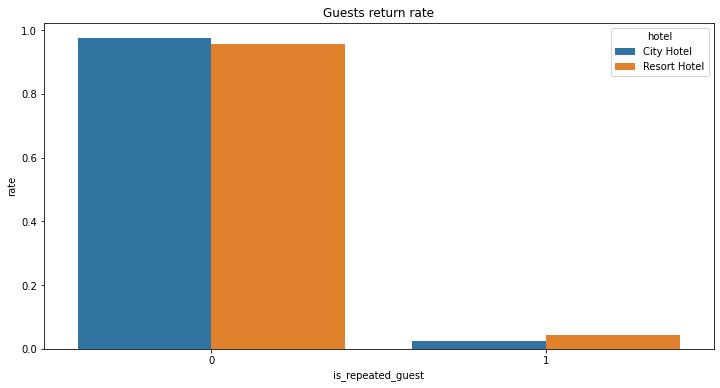

In [196]:
return_rate = dataset.groupby(["hotel","is_repeated_guest"]).size().reset_index(name='rate')
summe = return_rate.groupby("hotel")['rate'].transform("sum")
return_rate['rate'] = return_rate['rate'].div(summe)

plt.figure(figsize=(12,6))
sns.barplot(x='is_repeated_guest', y='rate',hue='hotel', data= return_rate)

plt.title('Guests return rate')
plt.show()

Most guests don't return, the resort hotel has a higher possibility to have return guests.



**To check which type of customers are more likely to cancel the bookings**

In [197]:
dataset['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [198]:
dataset['is_canceled'].value_counts()


0    75166
1    44224
Name: is_canceled, dtype: int64

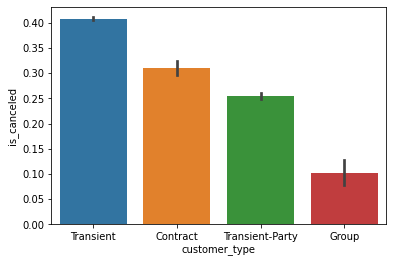

In [199]:
#barplot shows the relationship between a numeric and a categoric variable. 
sns.barplot(x=dataset['customer_type'],y=dataset['is_canceled'].astype('int64'))

Transient customer type are more likely to cancel the booking more than the other types



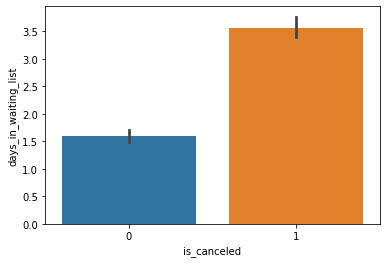

In [200]:
sns.barplot(y=dataset['days_in_waiting_list'],x=dataset['is_canceled'].astype('int64'))

As days in waiting list increase the booking is more likely to be cancelled



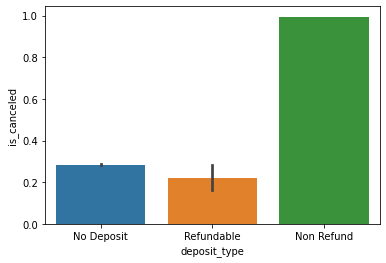

In [201]:
sns.barplot(x=dataset['deposit_type'],y=dataset['is_canceled'].astype('int64'))


Booking with Non Refund deposit type are more likely to cancel the booking

**To check and visualise special request for bookings**

In [202]:
dataset.total_of_special_requests


0         0
1         0
2         0
3         0
4         1
         ..
119385    0
119386    2
119387    4
119388    0
119389    2
Name: total_of_special_requests, Length: 119390, dtype: int64

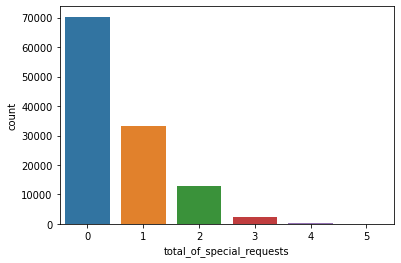

In [203]:
# countplot() method is used to Show the counts of observations
#in each categorical bin using bars
sns.countplot(dataset['total_of_special_requests']);

**To analyse and visualize Hotel checkouts in USA**

In [204]:
USA_dataset1 = dataset[dataset["country"] == 'USA']
USA_dataset1.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0,0,Breakfast,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240,0,0,Transient,97.00,0,3,Check-Out,2015-07-05
59,Resort Hotel,0,14,2015,July,27,2,0,2,2,0,0,Breakfast,USA,Online TA,TA/TO,0,0,0,A,C,0,No Deposit,242,0,0,Transient,98.00,0,1,Check-Out,2015-07-04
65,Resort Hotel,0,10,2015,July,27,3,0,2,2,2,0,Breakfast,USA,Online TA,TA/TO,0,0,0,G,H,0,No Deposit,240,0,0,Transient,153.00,1,0,Check-Out,2015-07-05
92,Resort Hotel,0,9,2015,July,27,3,0,1,2,0,0,Breakfast,USA,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,241,0,0,Transient,94.71,0,0,Check-Out,2015-07-04
162,Resort Hotel,0,51,2015,July,28,6,1,3,2,0,0,Breakfast,USA,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,241,0,0,Transient,117.81,1,2,Check-Out,2015-07-10
166,Resort Hotel,0,51,2015,July,28,6,1,3,3,0,0,Breakfast,USA,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,241,0,0,Transient,117.81,0,2,Check-Out,2015-07-10
171,Resort Hotel,0,98,2015,July,28,6,1,1,2,0,0,Breakfast,USA,Online TA,TA/TO,0,0,0,D,F,0,No Deposit,240,0,0,Transient,87.30,1,1,Check-Out,2015-07-08
203,Resort Hotel,0,88,2015,July,28,7,0,4,3,0,0,Half Board,USA,Offline TA/TO,TA/TO,0,0,0,D,E,0,No Deposit,95,0,0,Transient,150.00,0,1,Check-Out,2015-07-11
248,Resort Hotel,0,10,2015,July,28,10,0,1,2,0,0,Breakfast,USA,Direct,Direct,0,0,0,A,A,0,No Deposit,250,0,0,Transient,131.00,0,0,Check-Out,2015-07-11
358,Resort Hotel,0,42,2015,July,29,13,1,2,2,0,0,Breakfast,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240,0,0,Transient,110.00,1,0,Check-Out,2015-07-16


In [205]:
USA_dataset1['reservation_status'].value_counts(normalize=True)

Check-Out    0.761087
Canceled     0.225083
No-Show      0.013829
Name: reservation_status, dtype: float64

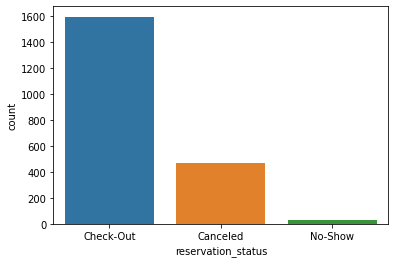

In [206]:
sns.countplot(USA_dataset1['reservation_status']);

From the reservation status we notice that the percentage of checkout is more than cancellations in the hotels of USA

**To analyse and visualize market segment for Resort hotel and City hotel**

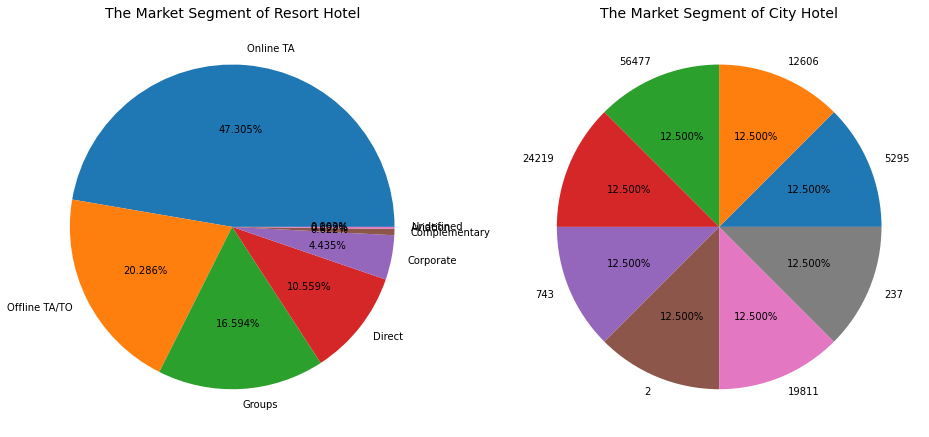

In [207]:
# The segment proportion of two hotels

fig = plt.figure(figsize = (16, 9))

ax = fig.add_subplot(121)
dataset['market_segment'].value_counts()
dataset_segment_pie = pd.DataFrame(dataset['market_segment'].value_counts())
ax.set_title('The Market Segment of Resort Hotel', fontsize = 14)
ax = plt.pie(x = dataset_segment_pie['market_segment'], labels = dataset_segment_pie.index, autopct = '%.3f%%')

ax = fig.add_subplot(122)
dataset['market_segment'].value_counts()
dataset_segment_pie = pd.DataFrame(dataset_segment_pie['market_segment'].value_counts())
ax.set_title('The Market Segment of City Hotel', fontsize = 14)
ax = plt.pie(x = dataset_segment_pie['market_segment'], labels = dataset_segment_pie.index, autopct = '%.3f%%')

**We conclude that about 47.3% of customers make bookings by online TA (Travel Agents)**


**From the pie graphs we can see that the Online TA takes a large part, it  means Internet booking has main current business for hotel bookings in the whole travel industry since 2015. This inspires merchants that they should expand Internet business and improve corresponding services** 